# Evaluate an ML model using SageMaker

![training notebook](img/sagemaker-mlops-model-evaluation-diagram.jpg)

In [1]:
!pip install scikit-learn s3fs==0.4.2 sagemaker xgboost mlflow==2.13.2 sagemaker-mlflow==0.1.0

Import relevant libraries

In [2]:
from model_evaluation import evaluation
import boto3
import sagemaker

/opt/conda/lib/python3.11/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


# Initialize Variables

In [5]:
region = "us-east-1"
boto_session = boto3.Session(region_name=region)
sess = sagemaker.Session(boto_session=boto_session)
bucket_name = sess.default_bucket()
bucket_prefix = "player-churn/xgboost"
notebook_param_s3_bucket_prefix=f"s3://{bucket_name}/{bucket_prefix}/params"
experiment_name = "player-churn-model-experiment"
mlflow_tracking_server_arn = "arn:aws:sagemaker:us-east-1:858451092442:mlflow-tracking-server/mlflow-d-muwzxeno4zza" # Provide a valid mlflow tracking server ARN. You can find the value in the output from 00-start-here.ipynb
run_id = None

In [6]:
assert len(mlflow_tracking_server_arn) > 0

# Interpreting the Predictions
The actual output of many binary classification algorithms is a prediction score. The score indicates the system's certainty that the given observation belongs to the positive class (the actual target value is 1). Binary classification models output a score that ranges from 0 to 1. As a consumer of this score, to make the decision about whether the observation should be classified as 1 or 0, you interpret the score by picking a classification threshold, or cut-off, and compare the score against it. Any observations with scores higher than the cut-off are predicted as target= 1, and scores lower than the cut-off are predicted as target= 0.

The default score cut-off is 0.5. You can choose to update this cut-off to match your business needs. You can use the visualizations in the console to understand how the choice of cut-off will affect your application.

## Measuring ML Model Accuracy
An industry-standard accuracy metric for binary classification models is called Area Under the (Receiver Operating Characteristic) Curve (AUC). AUC measures the ability of the model to predict a higher score for positive examples as compared to negative examples. Because it is independent of the score cut-off, you can get a sense of the prediction accuracy of your model from the AUC metric without picking a threshold.

The AUC metric returns a decimal value from 0 to 1. AUC values near 1 indicate an ML model that is highly accurate. Values near 0.5 indicate an ML model that is no better than guessing at random. Values near 0 are unusual to see, and typically indicate a problem with the data. Essentially, an AUC near 0 says that the ML model has learned the correct patterns, but is using them to make predictions that are flipped from reality ('0's are predicted as '1's and vice versa). For more information about AUC, go to the [Receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) page on Wikipedia.

The baseline AUC metric for a binary model is 0.5. It is the value for a hypothetical ML model that randomly predicts a 1 or 0 answer. Your binary ML model should perform better than this value to begin to be valuable.

File downloaded successfully to 02-preprocess.json
File downloaded successfully to 03-train.json


[01/16/25 11:49:10] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=6541;file:///opt/conda/lib/python3.11/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=678225;file:///opt/conda/lib/python3.11/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

File evaluation.json uploaded successfully to sagemaker-us-east-1-858451092442/player-churn/xgboost/evaluation/evaluation.json
File 04-evaluation.json uploaded successfully to sagemaker-us-east-1-858451092442/player-churn/xgboost/params/04-evaluation.json


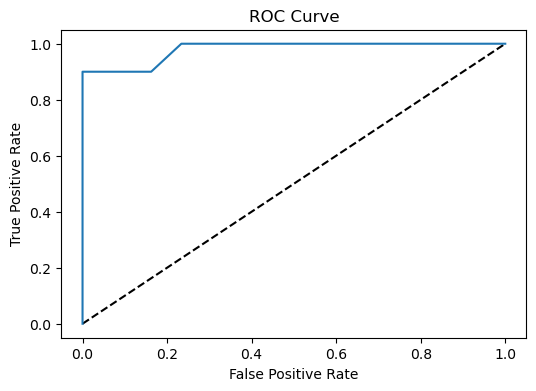

In [7]:
auc_score = evaluation.evaluate(region,
             bucket_prefix,
             mlflow_tracking_server_arn,
             experiment_name,
             run_id)

In [8]:
print(f"Model Evaluation: AUC Score: {auc_score}")

Model Evaluation: AUC Score: 0.9801948051948053
